In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'be54f9e8-da3e-45b0-9f9e-929c7af52dd6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-06-17T12:46:56.275Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 9642}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12217, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [4]:
type(data)

dict

In [23]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [12]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')

In [13]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12217,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987800e+07,1.987800e+07,False,NaN,1,NaN,NaN,None,2025-06-17T12:46:00.000Z,105764.669580,5.397460e+10,27.9344,0.194500,-0.956378,-3.475529,1.818336,24.884478,26.380764,2.102390e+12,63.8837,2.221058e+12,None,2025-06-17T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 05:51:50.174970
1,1027,Ethereum,ETH,ethereum,10345,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207208e+08,1.207208e+08,True,NaN,2,NaN,NaN,None,2025-06-17T12:46:00.000Z,2556.232082,2.550996e+10,34.6142,0.437567,-2.289306,-7.652539,2.159304,60.268516,27.672378,3.085905e+11,9.3751,3.085905e+11,None,2025-06-17T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 05:51:50.174970
2,825,Tether USDt,USDT,tether,132937,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.554762e+11,1.569966e+11,True,NaN,3,NaN,NaN,None,2025-06-17T12:45:00.000Z,1.000147,8.615194e+10,31.6966,-0.007431,0.007077,0.002632,0.011953,0.026961,0.021671,1.554990e+11,4.7241,1.570196e+11,None,2025-06-17T12:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-17 05:51:50.174970
3,52,XRP,XRP,xrp,1626,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.888176e+10,9.998604e+10,False,NaN,4,NaN,NaN,None,2025-06-17T12:46:00.000Z,2.211648,5.010968e+09,97.7375,0.834820,-1.722625,-4.399666,-7.317107,6.098214,-4.757021,1.302257e+11,3.9563,2.211648e+11,None,2025-06-17T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 05:51:50.174970
4,1839,BNB,BNB,bnb,2585,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408863e+08,1.408863e+08,False,NaN,5,NaN,NaN,None,2025-06-17T12:46:00.000Z,653.851029,1.730344e+09,15.5282,0.139444,-0.232178,-1.865909,1.304202,10.428806,7.637770,9.211865e+10,2.7986,9.211865e+10,None,2025-06-17T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 05:51:50.174970
5,5426,Solana,SOL,solana,936,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.278729e+08,6.032893e+08,True,NaN,6,5.252369e+08,7.921153e+10,None,2025-06-17T12:46:00.000Z,150.811049,4.499379e+09,-4.8778,0.209207,-2.996499,-6.106366,-11.820944,11.731281,18.417240,7.960907e+10,2.4186,9.098269e+10,None,2025-06-17T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 05:51:50.174970
6,3408,USDC,USDC,usd-coin,28706,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.155321e+10,6.155321e+10,False,NaN,7,6.090122e+10,6.089560e+10,None,2025-06-17T12:45:00.000Z,0.999908,1.228678e+10,41.3759,-0.002012,0.004297,0.013401,0.015907,-0.009223,0.003504,6.154752e+10,1.8702,6.154752e+10,None,2025-06-17T12:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-17 05:51:50.174970
7,1958,TRON,TRX,tron,1187,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.483236e+10,9.483238e+10,True,NaN,8,7.165966e+10,2.002419e+10,None,2025-06-17T12:46:00.000Z,0.279435,1.312644e+09,81.2923,0.388527,-0.626284,-4.503789,2.555355,14.472260,21.576749,2.649945e+10,0.8052,2.649945e+10,None,2025-06-17T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 05:51:50.174970
8,74,Dogecoin,DOGE,dogecoin,1236,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt,

In [25]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'be54f9e8-da3e-45b0-9f9e-929c7af52dd6',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #df2=pd.json_normalize(data['data'])
    #df2['timestamp']=pd.to_datetime('now')
    #df = pd.concat([df, df2], ignore_index=True)


    df=pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now')
    df

    if not os.path.isfile(r"C:\Users\LENOVO\Downloads\API.csv"):
        df.to_csv(r"C:\Users\LENOVO\Downloads\API.csv",header='column_names')
    else:
        df.to_csv(r"C:\Users\LENOVO\Downloads\API.csv",mode='a',header=False)

In [26]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(5) #sleep for 5 sec 
exit()


API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [24]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12217,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987800e+07,1.987800e+07,False,NaN,1,NaN,NaN,None,2025-06-17T12:46:00.000Z,105764.669580,5.397460e+10,27.9344,0.194500,-0.956378,-3.475529,1.818336,24.884478,26.380764,2.102390e+12,63.8837,2.221058e+12,None,2025-06-17T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 05:51:50.174970
1,1027,Ethereum,ETH,ethereum,10345,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207208e+08,1.207208e+08,True,NaN,2,NaN,NaN,None,2025-06-17T12:46:00.000Z,2556.232082,2.550996e+10,34.6142,0.437567,-2.289306,-7.652539,2.159304,60.268516,27.672378,3.085905e+11,9.3751,3.085905e+11,None,2025-06-17T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 05:51:50.174970
2,825,Tether USDt,USDT,tether,132937,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.554762e+11,1.569966e+11,True,NaN,3,NaN,NaN,None,2025-06-17T12:45:00.000Z,1.000147,8.615194e+10,31.6966,-0.007431,0.007077,0.002632,0.011953,0.026961,0.021671,1.554990e+11,4.7241,1.570196e+11,None,2025-06-17T12:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-17 05:51:50.174970
3,52,XRP,XRP,xrp,1626,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.888176e+10,9.998604e+10,False,NaN,4,NaN,NaN,None,2025-06-17T12:46:00.000Z,2.211648,5.010968e+09,97.7375,0.834820,-1.722625,-4.399666,-7.317107,6.098214,-4.757021,1.302257e+11,3.9563,2.211648e+11,None,2025-06-17T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 05:51:50.174970
4,1839,BNB,BNB,bnb,2585,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408863e+08,1.408863e+08,False,NaN,5,NaN,NaN,None,2025-06-17T12:46:00.000Z,653.851029,1.730344e+09,15.5282,0.139444,-0.232178,-1.865909,1.304202,10.428806,7.637770,9.211865e+10,2.7986,9.211865e+10,None,2025-06-17T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 05:51:50.174970
5,5426,Solana,SOL,solana,936,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.278729e+08,6.032893e+08,True,NaN,6,5.252369e+08,7.921153e+10,None,2025-06-17T12:46:00.000Z,150.811049,4.499379e+09,-4.8778,0.209207,-2.996499,-6.106366,-11.820944,11.731281,18.417240,7.960907e+10,2.4186,9.098269e+10,None,2025-06-17T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 05:51:50.174970
6,3408,USDC,USDC,usd-coin,28706,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.155321e+10,6.155321e+10,False,NaN,7,6.090122e+10,6.089560e+10,None,2025-06-17T12:45:00.000Z,0.999908,1.228678e+10,41.3759,-0.002012,0.004297,0.013401,0.015907,-0.009223,0.003504,6.154752e+10,1.8702,6.154752e+10,None,2025-06-17T12:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-17 05:51:50.174970
7,1958,TRON,TRX,tron,1187,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.483236e+10,9.483238e+10,True,NaN,8,7.165966e+10,2.002419e+10,None,2025-06-17T12:46:00.000Z,0.279435,1.312644e+09,81.2923,0.388527,-0.626284,-4.503789,2.555355,14.472260,21.576749,2.649945e+10,0.8052,2.649945e+10,None,2025-06-17T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 05:51:50.174970
8,74,Dogecoin,DOGE,dogecoin,1236,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt,

In [27]:
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\API.csv")

In [28]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12217,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.987800e+07,1.987800e+07,False,NaN,1,NaN,NaN,NaN,2025-06-17T13:32:00.000Z,105647.805869,5.415407e+10,25.9837,-0.033551,-1.032060,-3.524216,1.649105,24.933026,25.947172,2.100067e+12,63.8663,2.218604e+12,NaN,2025-06-17T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 06:33:25.116167
1,1,1027,Ethereum,ETH,ethereum,10345,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207208e+08,1.207208e+08,True,NaN,2,NaN,NaN,NaN,2025-06-17T13:32:00.000Z,2558.177810,2.546076e+10,28.2643,0.354571,-2.224094,-6.938409,1.854146,60.763063,27.177025,3.088254e+11,9.3976,3.088254e+11,NaN,2025-06-17T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 06:33:25.116167
2,2,825,Tether USDt,USDT,tether,132944,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.554762e+11,1.569966e+11,True,NaN,3,NaN,NaN,NaN,2025-06-17T13:31:00.000Z,1.000067,8.585019e+10,30.1972,-0.027752,0.014417,-0.013912,0.001235,0.015686,-0.012700,1.554867e+11,4.7315,1.570072e+11,NaN,2025-06-17T13:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-17 06:33:25.116167
3,3,52,XRP,XRP,xrp,1626,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.888176e+10,9.998604e+10,False,NaN,4,NaN,NaN,NaN,2025-06-17T13:32:00.000Z,2.218712,4.944059e+09,87.3712,0.609624,-1.614077,-3.574726,-7.196487,6.966632,-10.566699,1.306417e+11,3.9755,2.218712e+11,NaN,2025-06-17T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 06:33:25.116167
4,4,1839,BNB,BNB,bnb,2585,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.408863e+08,1.408863e+08,False,NaN,5,NaN,NaN,NaN,2025-06-17T13:32:00.000Z,655.575471,1.732266e+09,15.5449,0.284703,0.056140,-1.592926,1.431088,10.762458,8.168524,9.236160e+10,2.8106,9.236160e+10,NaN,2025-06-17T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 06:33:25.116167
5,5,5426,Solana,SOL,solana,936,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.278728e+08,6.032893e+08,True,NaN,6,5.252369e+08,7.885396e+10,NaN,2025-06-17T13:32:00.000Z,150.130276,4.502186e+09,-4.2527,-0.381500,-3.414295,-6.509339,-12.580813,11.537999,17.215562,7.924968e+10,2.4116,9.057198e+10,NaN,2025-06-17T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 06:33:25.116167
6,6,3408,USDC,USDC,usd-coin,28707,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,6.156896e+10,6.156896e+10,False,NaN,7,6.090122e+10,6.089154e+10,NaN,2025-06-17T13:31:00.000Z,0.999841,1.232770e+10,40.3335,-0.019706,0.013321,-0.009085,0.004033,-0.013129,-0.027864,6.155916e+10,1.8726,6.155916e+10,NaN,2025-06-17T13:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-17 06:33:25.116167
7,7,1958,TRON,TRX,tron,1187,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.483236e+10,9.483223e+10,True,NaN,8,7.165966e+10,2.003558e+10,NaN,2025-06-17T13:31:00.000Z,0.279594,1.073139e+09,11.8746,0.210278,-0.765343,-4.812684,2.759603,14.894671,20.914454,2.651451e+10,0.8063,2.651448e+10,NaN,2025-06-17T13:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 06:33:25.116167
8,8,74,Dogecoin,DOGE,dogecoin,1236,2013-12-15T00:00:00.000Z,"['mi

In [29]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [30]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12217,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19878000.00000,19878000.00000,False,NaN,1,NaN,NaN,NaN,2025-06-17T13:32:00.000Z,105647.80587,54154066972.53135,25.98370,-0.03355,-1.03206,-3.52422,1.64910,24.93303,25.94717,2100067085059.14502,63.86630,2218603923243.89014,NaN,2025-06-17T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 06:33:25.116167
1,1,1027,Ethereum,ETH,ethereum,10345,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120720837.72829,120720837.72829,True,NaN,2,NaN,NaN,NaN,2025-06-17T13:32:00.000Z,2558.17781,25460764054.22083,28.26430,0.35457,-2.22409,-6.93841,1.85415,60.76306,27.17702,308825368288.53278,9.39760,308825368288.53003,NaN,2025-06-17T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 06:33:25.116167
2,2,825,Tether USDt,USDT,tether,132944,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,155476225902.81683,156996633420.23590,True,NaN,3,NaN,NaN,NaN,2025-06-17T13:31:00.000Z,1.00007,85850186846.69600,30.19720,-0.02775,0.01442,-0.01391,0.00123,0.01569,-0.01270,155486679349.56665,4.73150,157007189091.60999,NaN,2025-06-17T13:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-17 06:33:25.116167
3,3,52,XRP,XRP,xrp,1626,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58881764070.00000,99986037638.00000,False,NaN,4,NaN,NaN,NaN,2025-06-17T13:32:00.000Z,2.21871,4944058833.88491,87.37120,0.60962,-1.61408,-3.57473,-7.19649,6.96663,-10.56670,130641654674.96941,3.97550,221871162894.60999,NaN,2025-06-17T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 06:33:25.116167
4,4,1839,BNB,BNB,bnb,2585,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,140886302.02000,140886302.02000,False,NaN,5,NaN,NaN,NaN,2025-06-17T13:32:00.000Z,655.57547,1732266177.36086,15.54490,0.28470,0.05614,-1.59293,1.43109,10.76246,8.16852,92361603768.50130,2.81060,92361603768.50000,NaN,2025-06-17T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 06:33:25.116167
5,5,5426,Solana,SOL,solana,936,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,527872764.35890,603289268.76185,True,NaN,6,525236893.30000,78853959780.39594,NaN,2025-06-17T13:32:00.000Z,150.13028,4502186371.53711,-4.25270,-0.38150,-3.41430,-6.50934,-12.58081,11.53800,17.21556,79249683830.08821,2.41160,90571984454.49001,NaN,2025-06-17T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 06:33:25.116167
6,6,3408,USDC,USDC,usd-coin,28707,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,61568955185.19853,61568955185.19853,False,NaN,7,60901219650.23000,60891535553.67841,NaN,2025-06-17T13:31:00.000Z,0.99984,12327702445.24555,40.33350,-0.01971,0.01332,-0.00909,0.00403,-0.01313,-0.02786,61559164909.89669,1.87260,61559164909.90000,NaN,2025-06-17T13:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-17 06:33:25.116167
7,7,1958,TRON,TRX,tron,1187,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,94832363730.82941,94832233664.32629,True,NaN,8,71659659264.00000,20035576116.98214,NaN,2025-06-17T13:31:00.000Z,0.27959,1073138677.71200,11.87460,0.21028,-0.76534,-4.81268,2.75960,14.89467,

In [32]:
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [33]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.03355,-1.03206,-3.52422,1.64910,24.93303,25.94717
Ethereum,0.35457,-2.22409,-6.93841,1.85415,60.76306,27.17702
Tether USDt,-0.02775,0.01442,-0.01391,0.00123,0.01569,-0.01270
XRP,0.60962,-1.61408,-3.57473,-7.19649,6.96663,-10.56670
BNB,0.28470,0.05614,-1.59293,1.43109,10.76246,8.16852
Solana,-0.38150,-3.41430,-6.50934,-12.58081,11.53800,17.21556
USDC,-0.01971,0.01332,-0.00909,0.00403,-0.01313,-0.02786
TRON,0.21028,-0.76534,-4.81268,2.75960,14.89467,20.91445
Dogecoin,0.00654,-2.78888,-11.96838,-23.28537,10.25186,0.37823


In [34]:
df4=df3.stack()

In [35]:
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.03355
              quote.USD.percent_change_24h    -1.03206
              quote.USD.percent_change_7d     -3.52422
              quote.USD.percent_change_30d     1.64910
              quote.USD.percent_change_60d    24.93303
              quote.USD.percent_change_90d    25.94717
Ethereum      quote.USD.percent_change_1h      0.35457
              quote.USD.percent_change_24h    -2.22409
              quote.USD.percent_change_7d     -6.93841
              quote.USD.percent_change_30d     1.85415
              quote.USD.percent_change_60d    60.76306
              quote.USD.percent_change_90d    27.17702
Tether USDt   quote.USD.percent_change_1h     -0.02775
              quote.USD.percent_change_24h     0.01442
              quote.USD.percent_change_7d     -0.01391
              quote.USD.percent_change_30d     0.00123
              quote.USD.percent_change_60d     0.01569
              quote.US

In [37]:

type(df4)

pandas.core.series.Series

In [38]:
df5=df4.to_frame(name='values')

In [39]:
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.03355
             quote.USD.percent_change_24h  -1.03206
             quote.USD.percent_change_7d   -3.52422
             quote.USD.percent_change_30d   1.64910
             quote.USD.percent_change_60d  24.93303
             quote.USD.percent_change_90d  25.94717
Ethereum     quote.USD.percent_change_1h    0.35457
             quote.USD.percent_change_24h  -2.22409
             quote.USD.percent_change_7d   -6.93841
             quote.USD.percent_change_30d   1.85415
             quote.USD.percent_change_60d  60.76306
             quote.USD.percent_change_90d  27.17702
Tether USDt  quote.USD.percent_change_1h   -0.02775
             quote.USD.percent_change_24h   0.01442
             quote.USD.percent_change_7d   -0.01391
             quote.USD.percent_change_30d   0.00123
             quote.USD.percent_change_60d   0.01569
             quote.USD.percent_change_90d  -0.01270
XRP          quote.USD.percent_change_1h    0.60962
             quote.USD.percent_change_24h  -1.61408
             quote.USD.percent_change_7d   -3.57473
             quote.USD.percent_change_30d  -7.19649
             quote.USD.percent_change_60d   6.96663
             quote.USD.percent_change_90d -10.56670
BNB          quote.USD.percent_change_1h    0.28470
             quote.USD.percent_change_24h   0.05614
             quote.USD.percent_change_7d   -1.59293
             quote.USD.percent_change_30d   1.43109
             quote.USD.percent_change_60d  10.76246
             quote.USD.percent_change_90d   8.16852
Solana       quote.USD.percent_change_1h   -0.38150
             quote.USD.percent_change_24h  -3.41430
             quote.USD.percent_change_7d   -6.50934
             quote.USD.percent_change_30d -12.58081
             quote.USD.percent_change_60d  11.53800
             quote.USD.percent_change_90d  17.21556
USDC         quote.USD.percent_change_1h   -0.01971
             quote.USD.percent_change_24h   0.01332
             quote.USD.percent_change_7d   -0.00909
             quote.USD.percent_change_30d   0.00403
             quote.USD.percent_change_60d  -0.01313
             quote.USD.percent_change_90d  -0.02786
TRON         quote.USD.percent_change_1h    0.21028
             quote.USD.percent_change_24h  -0.76534
             quote.USD.percent_change_7d   -4.81268
             quote.USD.percent_change_30d   2.75960
             quote.USD.percent_change_60d  14.89467
             quote.USD.percent_change_90d  20.91445
Dogecoin     quote.USD.percent_change_1h    0.00654
             quote.USD.percent_change_24h  -2.78888
             quote.USD.percent_change_7d  -11.96838
             quote.USD.percent_change_30d -23.28537
             quote.USD.percent_change_60d  10.25186
             quote.USD.percent_change_90d   0.37823
Cardano      quote.USD.percent_change_1h    0.35207
             quote.USD.percent_change_24h  -2.97110
             quote.USD.percent_change_7d  -11.54769
             quote.USD.percent_change_30d -17.41133
             quote.USD.percent_change_60d   1.33449
             quote.USD.percent_change_90d -14.15120
Hyperliquid  quote.USD.percent_change_1h   -1.00347
             quote.USD.percent_change_24h  -9.76961
             quote.USD.percent_change_7d   -1.70359
             quote.USD.percent_change_30d  50.00506
             quote.USD.percent_change_60d 139.29140
             quote.USD.percent_change_90d 165.69231
Sui          quote.USD.percent_change_1h    0.49190
             quote.USD.percent_change_24h  -6.01725
             quote.USD.percent_change_7d  -16.64251
             quote.USD.percent_change_30d -24.19230
             quote.USD.percent_change_60d  37.11185
             quote.USD.percent_change_90d  23.39907
Bitcoin Cash quote.USD.percent_change_1h   -0.77814
             quote.USD.percent_change_24h   1.92949
             quote.USD.percent_change_7d    6.68626
             quote.USD.percent_change_30d

In [40]:
df5.count()

values    90
dtype: int64

In [42]:
index=pd.Index(range(90))

In [44]:
print(index)

RangeIndex(start=0, stop=90, step=1)


In [47]:
df6=df5.reset_index()

In [48]:
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03355
1,Bitcoin,quote.USD.percent_change_24h,-1.03206
2,Bitcoin,quote.USD.percent_change_7d,-3.52422
3,Bitcoin,quote.USD.percent_change_30d,1.64910
4,Bitcoin,quote.USD.percent_change_60d,24.93303
5,Bitcoin,quote.USD.percent_change_90d,25.94717
6,Ethereum,quote.USD.percent_change_1h,0.35457
7,Ethereum,quote.USD.percent_change_24h,-2.22409
8,Ethereum,quote.USD.percent_change_7d,-6.93841
9,Ethereum,quote.USD.percent_change_30d,1.85415


In [49]:
df7=df6.rename(columns={'level_1':'percent_change'})

In [64]:
df7

,name,percent_change,values
0,Bitcoin,1h,-0.03355
1,Bitcoin,24h,-1.03206
2,Bitcoin,7d,-3.52422
3,Bitcoin,30d,1.64910
4,Bitcoin,60d,24.93303
5,Bitcoin,90d,25.94717
6,Ethereum,1h,0.35457
7,Ethereum,24h,-2.22409
8,Ethereum,7d,-6.93841
9,Ethereum,30d,1.85415


In [63]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])

In [51]:
import seaborn as sns

In [52]:
import matplotlib.pyplot as plt

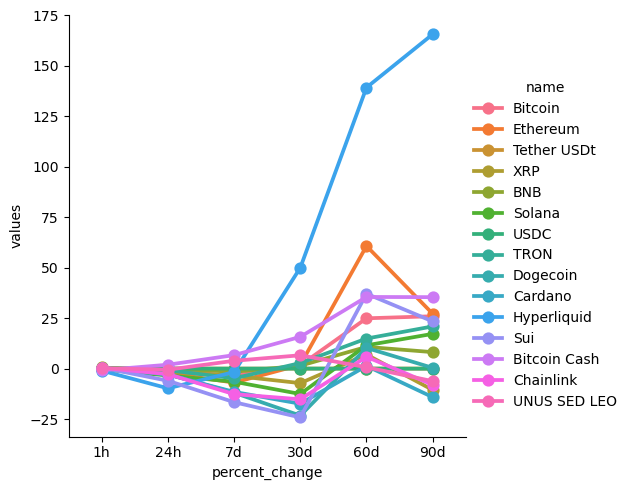

In [65]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')

In [66]:
df10=df[['name','quote.USD.price','timestamp']]

In [70]:
df10=df10.query("name=='Bitcoin'")

In [71]:
df10

,name,quote.USD.price,timestamp
0,Bitcoin,105647.80587,2025-06-17 06:33:25.116167
15,Bitcoin,105647.80587,2025-06-17 06:33:30.955910
30,Bitcoin,105647.80587,2025-06-17 06:33:36.707377
45,Bitcoin,105647.80587,2025-06-17 06:33:42.634401
60,Bitcoin,105647.80587,2025-06-17 06:33:48.425777
75,Bitcoin,105647.80587,2025-06-17 06:33:54.165723
90,Bitcoin,105647.80587,2025-06-17 06:34:00.036378
105,Bitcoin,105647.80587,2025-06-17 06:34:05.785791
120,Bitcoin,105647.80587,2025-06-17 06:34:11.606039


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

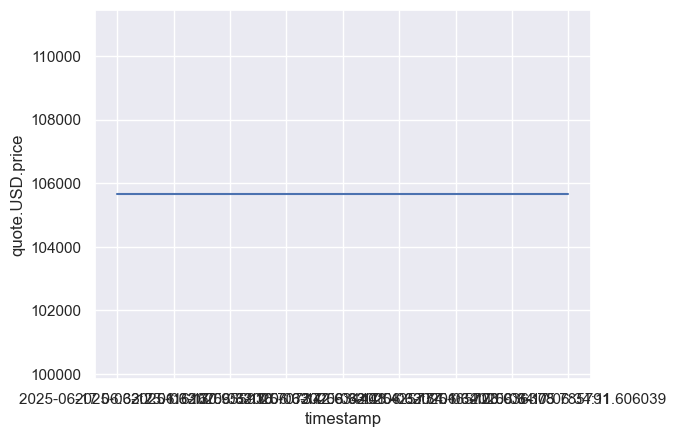

In [74]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)